## Remake dataset moving in xy direction (replicate of Mar13)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import imageio.v2 as imageio
import json
np.set_printoptions(threshold=np.inf)

In [15]:
#make json file
file = open('/home/vitran/plenoxels/blender_data/lego/transforms_train.json')
org_json = json.load(file)
new_frames = []
matrixes = []
for i, frame in enumerate(org_json['frames']):
    if i not in list(range(0,100,10)):
        # print('i in here' , i)
        continue
    matrix = np.asmatrix(frame['transform_matrix'], dtype=float)
    matrixes.append(matrix)
    # matrix = np.linalg.inv(matrix)
    incr = np.linspace(-0.4, 0.4, 4)
    xw = np.dot(matrix, np.array([1,0,0,0],dtype=float))   
    yw = np.dot(matrix, np.array([0,1,0,0],dtype=float))
    new_pos = []
    print(matrix)
    print(xw, yw)
    
    for x in incr:
        # matrix[0,3] +=x
        for y in incr:
            xyw = x*xw + y*yw
            print(xyw)
            each = matrix.copy()
            for t in range(4):
                each[t,3] += xyw[0,t]
            # matrix[1,3] +=y
            new_pos.append(each)
            # new_pos.append(np.linalg.inv(matrix))
            print(x,y)
            print(each)
    frame['transform_matrix'] = np.asarray(new_pos).tolist()
    new_frames.append(frame)

file.close()
org_json['frames'] = new_frames
with open('/home/vitran/plenoxels/blender_data/lego_gen10/transforms_train_multilens_16.json','w') as f:
    json.dump(org_json, f)

[[-9.99902189e-01  4.19224519e-03 -1.33457193e-02 -5.37983216e-02]
 [-1.39886811e-02 -2.99659073e-01  9.53943670e-01  3.84547043e+00]
 [-4.65661287e-10  9.54037189e-01  2.99688309e-01  1.20808232e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[-9.99902189e-01 -1.39886811e-02 -4.65661287e-10  0.00000000e+00]] [[ 0.00419225 -0.29965907  0.95403719  0.        ]]
[[ 0.39828398  0.1254591  -0.38161488 -0.        ]]
-0.4 -0.4
[[-9.99902189e-01  4.19224519e-03 -1.33457193e-02  3.44485656e-01]
 [-1.39886811e-02 -2.99659073e-01  9.53943670e-01  3.97092953e+00]
 [-4.65661287e-10  9.54037189e-01  2.99688309e-01  8.26467443e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 0.39940191  0.04555002 -0.12720496 -0.        ]]
-0.4 -0.13333333333333336
[[-9.99902189e-01  4.19224519e-03 -1.33457193e-02  3.45603588e-01]
 [-1.39886811e-02 -2.99659073e-01  9.53943670e-01  3.89102044e+00]
 [-4.65661287e-10  9.54037189e-01  2.99688309e-01  1.08087736e+00]
 

In [18]:
with open('/home/vitran/plenoxels/blender_data/lego/transforms_test_view0.json','r') as f:
    org_json = json.load(f)
    for i, frame in enumerate(org_json['frames']):
        # if i not in list(range(0,200,20)):
        #     # print('i in here' , i)
        #     continue
        matrix = np.asmatrix(frame['transform_matrix'], dtype=float)
        # matrix = np.linalg.inv(matrix)
        incr = np.linspace(-0.4, 0.4, 4)
        new_pos = []
        print(i)
        print(matrixes[0].astype(float))
        print(matrix)

0
[[-9.99999940e-01  0.00000000e+00  0.00000000e+00 -1.11022302e-16]
 [ 0.00000000e+00 -7.34109998e-01  6.79030597e-01  2.73726010e+00]
 [ 0.00000000e+00  6.79030657e-01  7.34109879e-01  2.95929170e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[-0.99999994  0.          0.          0.29999998]
 [ 0.         -0.73411     0.6790306   2.9574931 ]
 [ 0.          0.67903066  0.73410988  2.7555825 ]
 [ 0.          0.          0.          1.        ]]
1
[[-9.99999940e-01  0.00000000e+00  0.00000000e+00 -1.11022302e-16]
 [ 0.00000000e+00 -7.34109998e-01  6.79030597e-01  2.73726010e+00]
 [ 0.00000000e+00  6.79030657e-01  7.34109879e-01  2.95929170e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[-0.99999994  0.          0.          0.29999998]
 [ 0.         -0.73411     0.6790306   2.8106711 ]
 [ 0.          0.67903066  0.73410988  2.89138863]
 [ 0.          0.          0.          1.        ]]
2
[[-9.99999940e-01  0.00000000e+00  0.00000000e

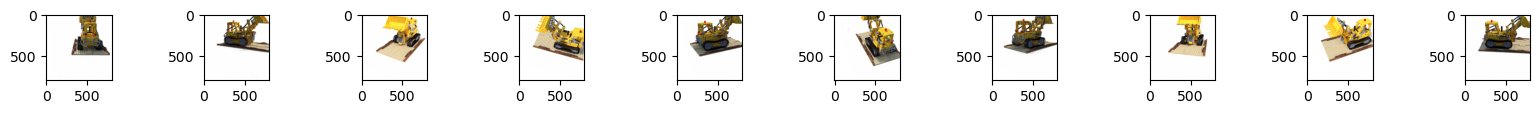

In [23]:
import glob
plt.figure(figsize=(20,10))
path = '/home/vitran/plenoxels/jax_logs10/original2/'
for i in range(10):
    img_path = f'{path}r_{i}_0.png'
    img = imageio.imread(img_path)
    plt.subplot(10,10,i+1)
    plt.imshow(img)
    # plt.axis('off')
    # plt.title(str(i))

In [ ]:
#0,1,3,5,7